In [1]:
import pandas as pd
from time import time

In [2]:
print("Let's start")

#Data preprocessing
dataroot="../MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df=pd.read_csv(dataroot,header=0,low_memory=False)
pd.set_option('mode.use_inf_as_na', True) # convert inf to nan
df['Flow Bytes/s']=df['Flow Bytes/s'].astype('float64')
df[' Flow Packets/s']=df[' Flow Packets/s'].astype('float64')
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)
df[' Flow Packets/s'].fillna(df[' Flow Packets/s'].mean(),inplace=True)
df[' Label'] = df[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)

#train_test_split
from sklearn.model_selection import train_test_split
t0 = time()
X_train, X_test, y_train,y_test = train_test_split(df.iloc[:,0:-1], df[' Label'], test_size=0.3, random_state=42)
tt = time()-t0
print ("Split dataset in {} seconds".format(round(tt,3)))

Let's start
Split dataset in 0.312 seconds


In [3]:
#Feature scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
    


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [3]:
print(X_train.shape)
print(X_test.shape)
print(X_train)

(158021, 78)
(67724, 78)
         Destination Port   Flow Duration   Total Fwd Packets  \
25873                  80           42153                   3   
116520                 80        88552329                   8   
150470                 80          793028                   3   
94136                  80        81914736                   9   
171384                 80          219179                   3   
212255                 53           92818                   1   
27905                  80         4286888                   5   
44662                  80          505577                   3   
5370                55279             229                   2   
12714                  53           48847                   2   
34908                  80           30112                   3   
22471                 443         4588146                   5   
2849                  443        20086880                  15   
142731                 80           47057                   3   


In [8]:
#Training KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree', leaf_size=500)
t0 = time()
classifier.fit(X_train,y_train)
tt = time()-t0
print ("Classifier trained in {} seconds".format(round(tt,3)))


Classifier trained in 58.548 seconds


In [9]:

#Testing KNN model
t0 = time()
y_predict = classifier.predict(X_test)
tt = time() - t0
print ("Predicted in {} seconds".format(round(tt,3)))


Predicted in 1461.244 seconds


In [10]:

#Showing Results
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test, y_predict)
print ("Accuracy is {}.".format(round(accuracy,4)))
precision = precision_score(y_test, y_predict)
print ("Precision is {}.".format(round(precision,4)))
recall = recall_score(y_test, y_predict)
print ("Recall is {}.".format(round(recall,4)))
print ("F is {}.".format(round(f1_score(y_test, y_predict),4)))


Accuracy is 0.9995.
Precision is 0.9998.
Recall is 0.9994.
F is 0.9996.


In [11]:

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
plt.plot(fpr,tpr,marker = 'o')
plt.show()
from sklearn.metrics import auc
AUC = auc(fpr, tpr)
print ("AUC is {}.".format(round(recall,4)))

<Figure size 640x480 with 1 Axes>

AUC is 0.9994.


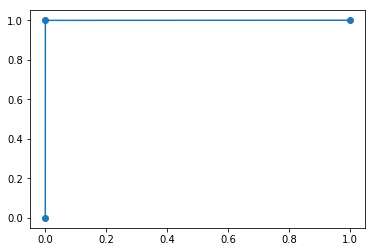

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
plt.plot(fpr,tpr,marker = 'o')
plt.show()